In [ ]:
!pip install pyTsetlinMachine

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Working Model

In [ ]:
# Interpretability

from pyTsetlinMachine.tm import MultiClassTsetlinMachine
import numpy as np

number_of_features = 12
noise = 1
number_of_clauses = 10

training_data = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/NoisyXORTrainingData.txt").astype(dtype=np.int32)
test_data = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/NoisyXORTestData.txt").astype(dtype=np.int32)

X_train = training_data[:,0:12] # Input features
Y_train = training_data[:,12] # Target value

X_test = test_data[:,0:12] # Input features
Y_test = test_data[:,12] # Target value

tm = MultiClassTsetlinMachine(number_of_clauses, 15, 3.0, boost_true_positive_feedback=0)		#(number_of_clauses, T, s)

tm.fit(X_train, Y_train, epochs=500)

pos_clause_list0 = []
neg_clause_list0 = []

pos_clause_list1 = []
neg_clause_list1 = []

print("Accuracy:", 100*(tm.predict(X_test) == Y_test).mean())

print("\nClass 0 Positive Clauses:\n")     

# TEST ARRAY 
# This is the new input array that can be changed by the user where everything after the first two elements is noise
test_array = [0,0,1,1,0,0,0,0,0,1,0,0] 

# range(start, stop, increment)
# end=' ' adds the end of this string to the next print string

print("\nClass 0 Positive Clauses:\n")																																							
for j in range(0, number_of_clauses, 2):       
	print("Clause #%d: " % (j), end=' ')          
	l = []
	for k in range(number_of_features*2):
		if tm.ta_action(0, j, k) == 1:
			if(k < number_of_features):
				l.append(" x%d" % (k))
			else:
				l.append("¬x%d" % (k-number_of_features))
	pos_clause_list0.append(l)									# adds each clause to a larger list of all positive clauses
	print(" ∧ ".join(l))

print("\nClass 0 Negative Clauses:\n")        # Outputting y = 1 	# Clauses vote for the class i.e if +clauses > -clauses then y =
for j in range(1, number_of_clauses, 2):                                        
	print("Clause #%d: " % (j), end=' ')
	l = []
	for k in range(number_of_features*2):
		if tm.ta_action(0, j, k) == 1: 						#	 1 = include therefore if included
			if k < number_of_features:
				l.append(" x%d" % (k))
			else:
				l.append("¬x%d" % (k-number_of_features))
	neg_clause_list0.append(l)
	print(" ∧ ".join(l))

print("\nClass 1 Positive Clauses:\n")        # Outputting y = 1
for j in range(0, number_of_clauses, 2):
	print("Clause #%d: " % (j), end=' ')
	l = []
	for k in range(number_of_features*2):
		if tm.ta_action(1, j, k) == 1:
			if k < number_of_features:
				l.append(" x%d" % (k))
			else:
				l.append("¬x%d" % (k-number_of_features))
	pos_clause_list1.append(l)	
	print(" ∧ ".join(l))

print("\nClass 1 Negative Clauses:\n")				# Outputting y = 0
for j in range(1, number_of_clauses, 2):
	print("Clause #%d: " % (j), end=' ')
	l = []
	for k in range(number_of_features*2):
		if tm.ta_action(1, j, k) == 1:
			if k < number_of_features:
				l.append(" x%d" % (k))
			else:
				l.append("¬x%d" % (k-number_of_features))
	neg_clause_list1.append(l)
	print(" ∧ ".join(l))


Accuracy: 100.0

Class 0 Positive Clauses:


Class 0 Positive Clauses:

Clause #0:  ¬x0 ∧ ¬x1
Clause #2:  ¬x0 ∧ ¬x1
Clause #4:   x0 ∧  x1
Clause #6:   x1
Clause #8:   x0 ∧  x1

Class 0 Negative Clauses:

Clause #1:   x0 ∧ ¬x1
Clause #3:   x0 ∧ ¬x1
Clause #5:   x5 ∧ ¬x0
Clause #7:  ¬x0
Clause #9:   x1 ∧ ¬x0

Class 1 Positive Clauses:

Clause #0:   x5
Clause #2:   x1 ∧ ¬x0
Clause #4:   x1
Clause #6:   x0 ∧ ¬x1
Clause #8:  ¬x1

Class 1 Negative Clauses:

Clause #1:  ¬x0 ∧ ¬x1
Clause #3:   x0 ∧  x1
Clause #5:   x0 ∧  x1
Clause #7:  ¬x0 ∧ ¬x1
Clause #9:   x0 ∧  x1


In [ ]:
# shows the clauses in lists and not just printed out, this allows them to be used in the boolean logic later
print("Class 0: Positive Clauses (+):", pos_clause_list0)
print("Class 0: Negative Clauses (-):", neg_clause_list0)
print("Class 1: Positive Clauses (+):", pos_clause_list1)
print("Class 1: Negative Clauses (-):", neg_clause_list1)

# breaks down the clauses per class into individual clauses as listed earlier
C0_clause0, C0_clause2, C0_clause4, C0_clause6, C0_clause8 = pos_clause_list0   # Class 0: Positive Clauses (+)

C0_clause1, C0_clause3, C0_clause5, C0_clause7, C0_clause9 = neg_clause_list0   # Class 0: Negative Clauses (-)

C1_clause0, C1_clause2, C1_clause4, C1_clause6, C1_clause8 = pos_clause_list1   # Class 1: Positive Clauses (+)

C1_clause1, C1_clause3, C1_clause5, C1_clause7, C1_clause9 = neg_clause_list1   # Class 1: Negative Clauses (-)

#For example ---
print("\nAn example of a single clause within the list --- Class 1: Negative Clause: 3", C1_clause3)

Class 0: Positive Clauses (+): [['¬x0', '¬x1'], ['¬x0', '¬x1'], [' x0', ' x1'], [' x1'], [' x0', ' x1']]
Class 0: Negative Clauses (-): [[' x0', '¬x1'], [' x0', '¬x1'], [' x5', '¬x0'], ['¬x0'], [' x1', '¬x0']]
Class 1: Positive Clauses (+): [[' x5'], [' x1', '¬x0'], [' x1'], [' x0', '¬x1'], ['¬x1']]
Class 1: Negative Clauses (-): [['¬x0', '¬x1'], [' x0', ' x1'], [' x0', ' x1'], ['¬x0', '¬x1'], [' x0', ' x1']]

An example of a single clause within the list --- Class 1: Negative Clause: 3 [' x0', ' x1']


In [ ]:
# The function that parses the clause lists and checks them against the test input array
def printToVar(clauseArray, inputArray):
    clauseValue = 0

    for items in clauseArray:

      # If there are 3 features per clause
      if len(items) == 3:             # This is when the clause contains 3 features  
        def1 = ''.join(items[0])      # converts the list to strings i.e each feature is turned into a string
        def2 = ''.join(items[1])
        def3 = ''.join(items[2])

        location1 = int(def1[-1:])    # Gets the location of the feature within test input array by isolating the number included in the string at index [-1]
        location2 = int(def2[-1:])
        location3 = int(def3[-1:])

        value1 = inputArray[location1]    # Gets the 1 or 0 value from the test input array at the location of the feature included in the clause to perform boolean logic
        value2 = inputArray[location2]
        value3 = inputArray[location3]

        if def1[0] == '¬':                # If there is a negated sign in front of the feature then the negation function is applied
          value1 = negation(value1)

        if def2[0] == '¬':
          value2 = negation(value2)

        if def3[0] == '¬':
          value3 = negation(value3)

        valueToReturn = value1&value2&value3      # Returns the ANDed value of the 1's or 0's included in the clause 
        clauseValue = clauseValue + valueToReturn       # Returns the sum of all the clause values 

      # If there are 2 features per clause
      if len(items) == 2:
        def1 = ''.join(items[0])
        def2 = ''.join(items[1])

        location1 = int(def1[-1:])
        location2 = int(def2[-1:])

        value1 = inputArray[location1]
        value2 = inputArray[location2]

        if def1[0] == '¬':
          value1 = negation(value1)

        if def2[0] == '¬':
          value2 = negation(value2)

        valueToReturn = value1&value2
        clauseValue = clauseValue + valueToReturn

        # if there is 1 feature per clause
        if len(items) == 1:
          value = ''.join(items)

          if value[0] == '¬':
            location = ''.join(items)
            intlocation = int(location[-1:])
            negatedVal = negation(inputArray[intlocation])
            clauseValue = clauseValue + negatedVal

          if value[0] != '':
            location = ''.join(items)
            intlocation = int(location[-1:])
            clauseValue = clauseValue + inputArray[intlocation]

    return clauseValue

# Inversion function acting in any case of '¬' negation 
def negation(var):
    if var == 0:
      new_var = 1
    elif var == 1:
      new_var = 0

    return new_var

In [ ]:
return_pos_clause_list0 =printToVar(pos_clause_list0, test_array)
return_neg_clause_list0 =printToVar(neg_clause_list0, test_array)
return_pos_clause_list1 =printToVar(pos_clause_list1, test_array)
return_neg_clause_list1 =printToVar(neg_clause_list1, test_array)

def assign_negative_polarity(clause_list):    # Assigns a negative sign to the negative clauses
  return clause_list*(-1)

def clause_summation(positive_clause_value, negative_clause_value):
  class_sum = positive_clause_value - negative_clause_value
  return class_sum

class0_sum = clause_summation(return_pos_clause_list0, return_neg_clause_list0)
class1_sum = clause_summation(return_pos_clause_list1, return_neg_clause_list1)

print("Class 0\t- Positive:\t", return_pos_clause_list0, "\n")
print("\t- Negative:\t", (-1)*return_neg_clause_list0, "\n")
print("\t- SUM:\t\t", class0_sum, "\n")
print("Class 1\t- Positive:\t", return_pos_clause_list1, "\n")
print("\t- Negative:\t", (-1)*return_neg_clause_list1, "\n")
print("\t- SUM:\t\t", class1_sum, "\n")



Class 0	- Positive:	 2 

	- Negative:	 0 

	- SUM:		 2 

Class 1	- Positive:	 0 

	- Negative:	 -2 

	- SUM:		 -2 



(-3.0, 3.0)

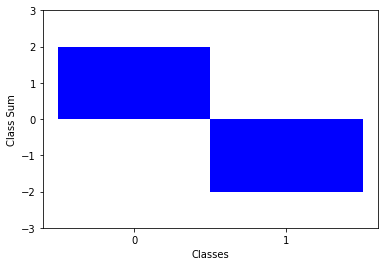

In [ ]:
import math
from matplotlib import pyplot as plt

x = range(2)
negative_data = [-1*return_neg_clause_list0, -1*return_neg_clause_list1]
positive_data = [return_pos_clause_list0, return_pos_clause_list1]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=1, align='center', color='b')
ax.bar(x, positive_data, width=1, align='center', color='b')


ax.set_ylabel('Class Sum')
ax.set_xlabel('Classes')

x = [0, 1]
y = [-3, -2, -1, 0, 1, 2, 3]

default_x_ticks = range(len(x))
default_y_ticks = range(len(y))

plt.xticks(default_x_ticks, x)

plt.ylim(-3, 3)